# <font color=red>Exploratory Data Analysis of 10 years of Los Angeles Traffic Accident History</font>
# <font color=red>N. J. Laurita</font>

In [700]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## <font color=red>Lets load and look at the data </font>

In [670]:
#---Lets load the data and take a look at the head and info to get a feel for it---#
#---From this we see that there are 502858 rows and 24 columns---#
collision_df = pd.read_csv('traffic-collision-data-from-2010-to-present.csv')
collision_df['index'] = np.arange(len(collision_df))
pd.set_option('max_columns', None)
collision_df.head(10)
#collision_df.info()

,DR_number,date_reported,date_occurred,time_occurred,area_ID,area_name,reporting_district,crime_code,crime_code_description,MO_codes,victim_age,victim_sex,victim_descent,premise_code,premise_description,address,cross_street,location,zip_codes,census_tracts,precint_boundaries,LA_specific_plans,council_districts,neighborhood_council,index
0,191323054,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,13,Newton,1385,997,TRAFFIC COLLISION,NaN,NaN,F,H,101.0,STREET,SAN PEDRO ST,SLAUSON AV,"{'longitude': '-118.2696', 'human_address': '{...",22352.0,786.0,858.0,7.0,13.0,46.0,0
1,192020666,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,15,20,Olympic,2054,997,TRAFFIC COLLISION,NaN,40.0,M,W,101.0,STREET,OLYMPIC BL,KINGSLEY AV,"{'longitude': '-118.3031', 'human_address': '{...",22723.0,617.0,646.0,NaN,12.0,89.0,1
2,191616992,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,230,16,Foothill,1669,997,TRAFFIC COLLISION,NaN,18.0,M,W,101.0,STREET,TUJUNGA CANYON BL,LA TUNA CANYON RD,"{'longitude': '-118.2704', 'human_address': '{...",3222.0,5.0,227.0,NaN,1.0,7.0,2
3,191824082,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,730,18,Southeast,1802,997,TRAFFIC COLLISION,605,23.0,M,H,101.0,STREET,88TH ST,MAIN ST,"{'longitude': '-118.2739', 'human_address': '{...",22352.0,800.0,358.0,7.0,14.0,45.0,3
4,191616980,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,720,16,Foothill,1689,997,TRAFFIC COLLISION,NaN,NaN,M,H,101.0,STREET,CROCKETT,SUNLAND,"{'longitude': '-118.3703', 'human_address': '{...",19335.0,166.0,272.0,NaN,3.0,21.0,4
5,191824078,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,1050,18,Southeast,1836,997,TRAFFIC COLLISION,4025 3037 3004 3026 3101,54.0,F,B,101.0,STREET,COMPTON AV,109TH ST,"{'longitude': '-118.2463', 'human_address': '{...",24354.0,817.0,1187.0,7.0,15.0,40.0,5
6,190417458,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,4,Hollenbeck,411,997,TRAFFIC COLLISION,605,33.0,F,B,101.0,STREET,BROADWAY,PASADENA AV,"{'longitude': '-118.2242', 'human_address': '{...",23448.0,492.0,943.0,1.0,11.0,1.0,6
7,191616985,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,700,16,Foothill,1687,997,TRAFFIC COLLISION,NaN,35.0,M,H,101.0,STREET,TUJUNGA AV,PENROSE ST,"{'longitude': '-118.3795', 'human_address': '{...",19335.0,162.0,272.0,NaN,3.0,21.0,7
8,191718751,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,1230,17,Devonshire,1775,997,TRAFFIC COLLISION,NaN,51.0,M,O,101.0,STREET,WISH,VINCENNES,"{'longitude': '-118.5084', 'human_address': '{...",18514.0,104.0,1422.0,NaN,2.0,87.0,8
9,191718743,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,10,17,Devonshire,1737,997,TRAFFIC COLLISION,NaN,23.0,F,H,101.0,STREET,HAYVENHURST,SAN FERNANDO MISSION,"{'longitude': '-118.4934', 'human_address': '{...",19329.0,78.0,382.0,NaN,2.0,79.0,9


# <font color=red> Here's some interesting facts we learn from the data: </font>

### <font color=blue>The most likely time for an accident is 6 PM but it's pretty high throughout most the day </font>

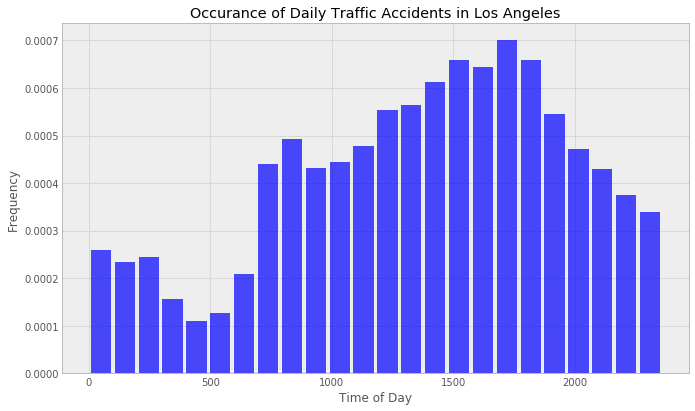

   time_occurred
0           1800


In [623]:
#---Lets start by asking the obvious question, when do accidents in LA occur?---#

time_occurred_df = collision_df[['time_occurred']]

plt.figure(figsize=(10,6))
plt.hist(collision_df.time_occurred, bins=24, color='b', alpha=0.7, rwidth=0.85, density=True)
xmin, xmax = plt.xlim()
plt.xlabel(f'Time of Day')
plt.ylabel('Frequency')
plt.title(f'Occurance of Daily Traffic Accidents in Los Angeles')
plt.style.use('ggplot')
plt.show()

print(time_occurred_df.mode())

#---Not surprisingly, the average and median times are in the middle of the day---#
#avg_collision_time = collision_df['time_occurred'].mean()
#median_collision_time = collision_df['time_occurred'].median()

### <font color=blue>The most susceptible population to traffic accidents are in their late 20's to early 30's. </font>

C:\Users\nlaur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nlaur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


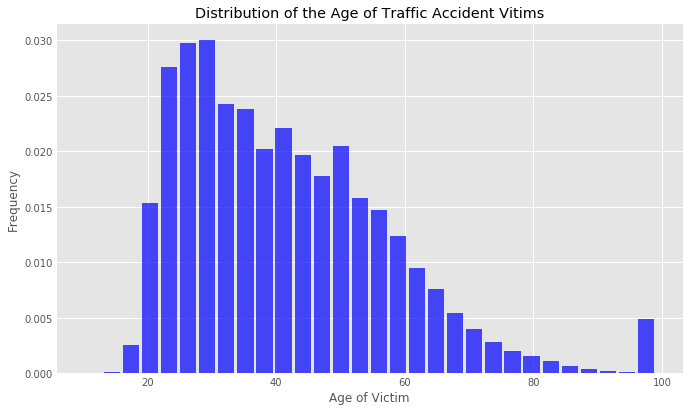

In [612]:
#---What are the ages of victims of traffic accident in LA?---#

victim_age_df = time_occurred_df = collision_df[['victim_age']]

#---The average is between 41 and 42 years old---#
avg_victim_age = collision_df['victim_age'].mean()

#---But the mode is 30---#
mode_vitim_age = victim_age_df.mode()

plt.figure(figsize=(10,6))
plt.hist(collision_df.victim_age, bins=30, color='b', alpha=0.7, rwidth=0.85, density=True)
xmin, xmax = plt.xlim()
plt.xlabel(f'Age of Victim')
plt.ylabel('Frequency')
plt.title(f'Distribution of the Age of Traffic Accident Vitims')
plt.style.use('ggplot')
plt.show()


### <font  color=blue> Men are over 20% more likely to be the victim of a traffic accient than women in LA! </font>

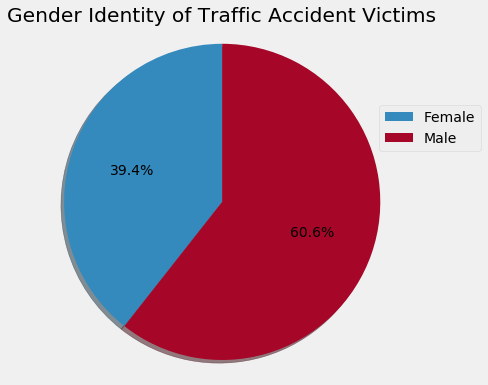

In [505]:
#---Are men or women more likely to be the victim of a traffic accident?---#

collision_victim_df = collision_df[['victim_sex']].reset_index()
collision_victim_df['accident_total'] = 1
#collision_victim_df.head(10)

collision_victim_df_grouped = collision_victim_df.groupby('victim_sex').sum().reset_index()
collision_victim_df_grouped.sort_values(by=['accident_total'], inplace=True)
#collision_victim_df_grouped.head(10)

gender_label = ['Female', 'Male']

    
collision_victim_df_grouped_100 = collision_victim_df_grouped[collision_victim_df_grouped.accident_total >= 50000]

collision_victim_df_grouped_100.plot.pie(y='accident_total', figsize=(6, 6), labels = None, shadow = True, autopct='%1.1f%%', startangle=90)
plt.title('Gender Identity of Traffic Accident Victims')
plt.style.use('bmh')
plt.legend(gender_label,bbox_to_anchor=(0.9,0.8), loc="upper left")
plt.ylabel("")
plt.axis('equal')
plt.show()

### <font  color=blue> The most dangerous intersection in LA isn't downtown, it's 20 miles away! </font>

C:\Users\nlaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nlaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


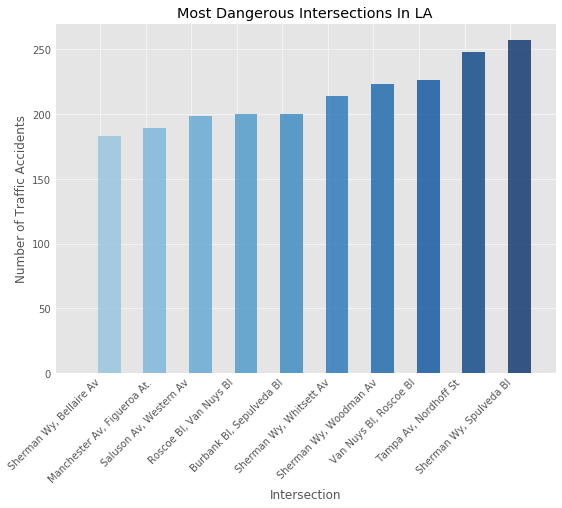

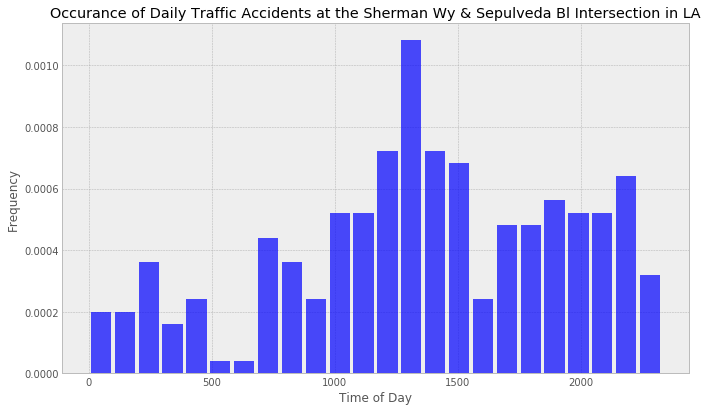

In [683]:
#---Whats the most dangerous intersection?---#

collision_intersection_df = collision_df[['address', 'cross_street']].reset_index()
collision_intersection_df['accident_total'] = 1
#collision_intersection_df.head(10)

collision_intersection_df_grouped = collision_intersection_df.groupby(['address', 'cross_street']).sum().reset_index()
collision_intersection_df_grouped.sort_values(by=['accident_total'], inplace=True, ascending=False)
collision_intersection_df_grouped['intersection'] = collision_intersection_df_grouped['address'] + ',' + collision_intersection_df_grouped['cross_street']
collision_intersection_df_grouped.head(20)
#collision_intersection_df_grouped.info()

top_ten_intersection = collision_intersection_df_grouped.iloc[:10]
top_ten_intersection.sort_values(by=['accident_total'], inplace=True)
#top_ten_intersection.head(20)

top_ten_intersection['xlabels'] = ['Sherman Wy, Bellaire Av', 'Manchester Av, Figueroa At.','Saluson Av, Western Av','Roscoe Bl, Van Nuys Bl','Burbank Bl, Sepulveda Bl', \
                                   'Sherman Wy, Whitsett Av', 'Sherman Wy, Woodman Av', 'Van Nuys Bl, Roscoe Bl', 'Tampa Av, Nordhoff St', 'Sherman Wy, Spulveda Bl']

color = cm.Blues(np.linspace(0.4, 1, 10))

top_ten_intersection.plot(x ='xlabels', y='accident_total', kind='bar', figsize=(8, 6), color=color, legend = None, align='center', alpha=0.8)
plt.title('Most Dangerous Intersections In LA')
plt.style.use('bmh')
plt.ylabel("Number of Traffic Accidents")
plt.xlabel("Intersection")
plt.xticks(np.arange(-1.2, 10, 1), rotation=45)
plt.show()

#---The most dangerous intersection is 21 miles from downtown LA!---#

#---What times do accidents occur at Sherman Wy & Sepulveda Bl?---#
time_intersection_df = collision_df[['time_occurred', 'address', 'cross_street']]
time_Sherman_Sepulveda_df = time_intersection_df[(time_intersection_df.address == 'SHERMAN                      WY') & (time_intersection_df.cross_street == 'SEPULVEDA                    BL')]

plt.figure(figsize=(10,6))
plt.hist(time_Sherman_Sepulveda_df.time_occurred, bins=24, color='b', alpha=0.7, rwidth=0.85, density=True)
xmin, xmax = plt.xlim()
plt.xlabel(f'Time of Day')
plt.ylabel('Frequency')
plt.title(f'Occurance of Daily Traffic Accidents at the Sherman Wy & Sepulveda Bl Intersection in LA')
plt.style.use('ggplot')
plt.show()

#---This distribution has a very differnt look than the city-wide distribution---#

### <font  color=blue> Only about 75% of accidents are reported the same day they occurr! </font>

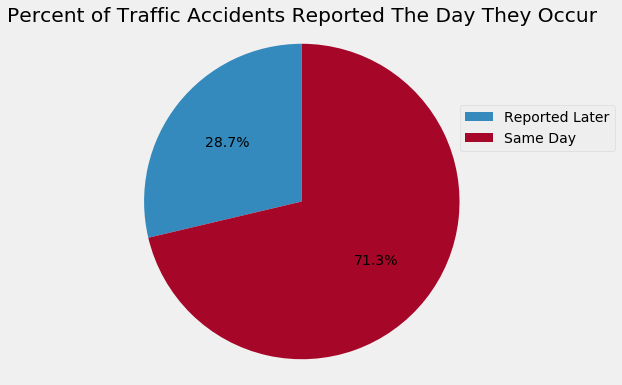

In [504]:
#---How many accidents are reported the same day?---#

collision_date_reported_df = collision_df[['date_reported', 'date_occurred']].reset_index()
collision_date_reported_df['reported_same_day'] = collision_date_reported_df['date_reported'] == collision_date_reported_df['date_occurred']
collision_date_reported_df['accident_total'] = 1
#collision_date_reported_df.head(10)

collision_date_reported_df_grouped = collision_date_reported_df.groupby('reported_same_day').sum().reset_index()
collision_date_reported_df_grouped.head(20)
#collision_intersection_df_grouped.info()

report_label = ['Reported Later', 'Same Day']

collision_date_reported_df_grouped.plot.pie(y='accident_total',figsize=(6, 6), labels = None, autopct='%1.1f%%', startangle=90)
plt.title('Percent of Traffic Accidents Reported The Day They Occur')
plt.style.use('bmh')
plt.legend(report_label,bbox_to_anchor=(0.9,0.8), loc="upper left")
plt.ylabel("")
plt.axis('equal')
plt.show()

### <font  color=blue> Over 95% of accidents occur on streets, another 3% in parking lots, but freeways are suprising safe! </font>

C:\Users\nlaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


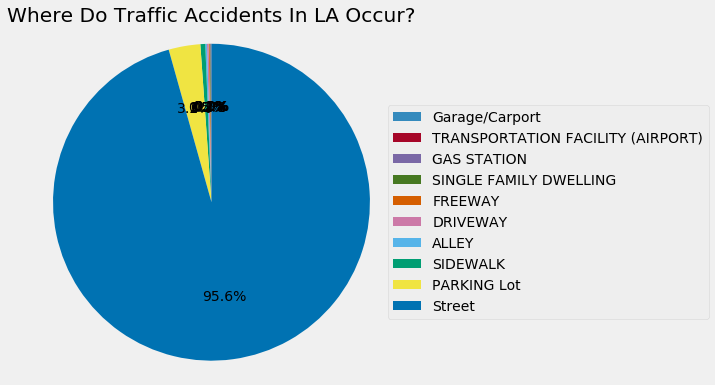

In [506]:
#---Whats the most dangerous premise?---#

collision_premdescript_df = collision_df[['premise_description']].reset_index()
collision_premdescript_df['accident_total'] = 1
#collision_premdescript_df.head(10)

collision_premdescript_df_grouped = collision_premdescript_df.groupby('premise_description').sum().reset_index()
collision_premdescript_df_grouped.sort_values(by=['accident_total'], inplace=True, ascending=False)
#collision_premdescript_df_grouped.head(20)

top_ten_premdescript = collision_premdescript_df_grouped.iloc[:10]
top_ten_premdescript.sort_values(by=['accident_total'], inplace=True)
#top_ten_premdescript.head(20)

premise_label = ['Garage/Carport', 'TRANSPORTATION FACILITY (AIRPORT)', 'GAS STATION', 'SINGLE FAMILY DWELLING', 'FREEWAY', 'DRIVEWAY', 'ALLEY', 'SIDEWALK', 'PARKING Lot', 'Street']

top_ten_premdescript.plot.pie(y='accident_total',figsize=(6, 6), labels = None, autopct='%1.1f%%', startangle=90)
plt.title('Where Do Traffic Accidents In LA Occur?')
plt.style.use('bmh')
plt.legend(premise_label,bbox_to_anchor=(0.95,0.8), loc="upper left")
plt.ylabel("")
plt.axis('equal')
plt.show()

### <font  color=blue> The most dangerous street in LA is Western Ave., over 6000 accidents in the last 10 years! </font>

C:\Users\nlaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\nlaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


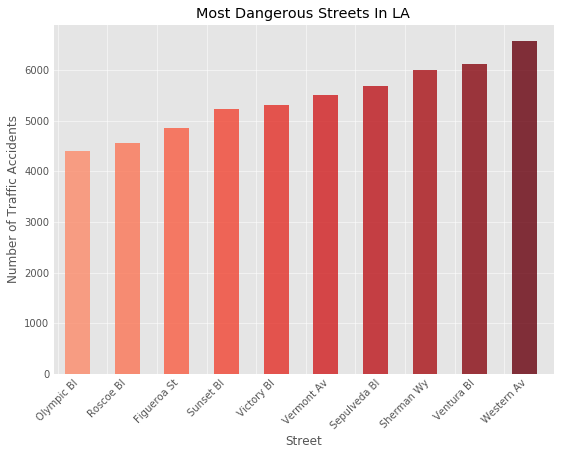

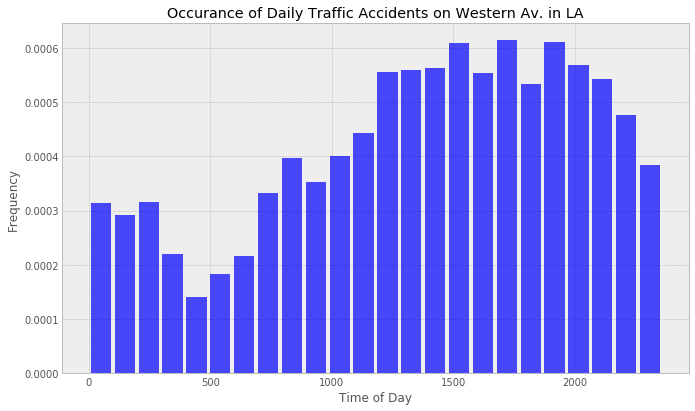

In [676]:
#---Which street is the most dangerous?---#

collision_add_df = collision_df[['address']].reset_index()
collision_add_df['accident_total'] = 1
#collision_add_df.head(10)

collision_add_df_grouped = collision_add_df.groupby('address').sum().reset_index()
collision_add_df_grouped.sort_values(by=['accident_total'], inplace=True, ascending=False)
#collision_add_df_grouped.head(20)

top_ten_addresses = collision_add_df_grouped.iloc[:10]
top_ten_addresses.sort_values(by=['accident_total'], inplace=True)
top_ten_addresses.head(20)

top_ten_addresses['street_labels'] = ['Olympic Bl', 'Roscoe Bl', 'Figueroa St', 'Sunset Bl', 'Victory Bl', 'Vermont Av', 'Sepulveda Bl', 'Sherman Wy', 'Ventura Bl', 'Western Av']

color = cm.Reds(np.linspace(0.4, 1, 10))

top_ten_addresses.plot(x='street_labels', y='accident_total', kind='bar', color=color, figsize=(8, 6), legend = None, align='center', alpha=0.8)
plt.title('Most Dangerous Streets In LA')
plt.style.use('bmh')
plt.ylabel("Number of Traffic Accidents")
plt.xlabel("Street")
plt.xticks(np.arange(-0.4, 10, 1), rotation=45)
plt.show()

#---What times do accidents on Western Av. occur?---#
time_address_df = collision_df[['time_occurred', 'address']]
time_WesternAv_df = time_address_df[time_address_df.address == 'WESTERN                      AV']

plt.figure(figsize=(10,6))
plt.hist(time_WesternAv_df.time_occurred, bins=24, color='b', alpha=0.7, rwidth=0.85, density=True)
xmin, xmax = plt.xlim()
plt.xlabel(f'Time of Day')
plt.ylabel('Frequency')
plt.title(f'Occurance of Daily Traffic Accidents on Western Av. in LA')
plt.style.use('ggplot')
plt.show()

### <font  color=blue> While Western Ave. might be the most dangerous street, the most dangerous area is around 77th street! </font>

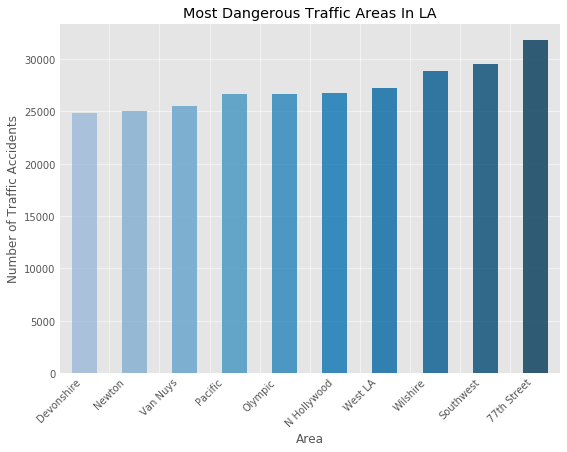

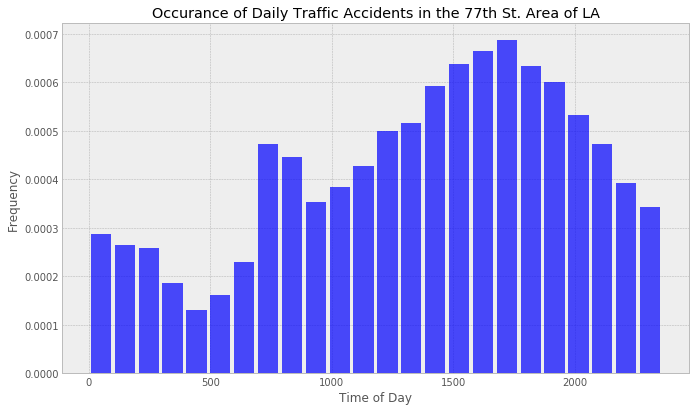

In [643]:
#---Which area is the most dangerous for traffic accidents?---#

collision_area_df = collision_df[['area_name']].reset_index()
collision_area_df['accident_total'] = 1
#collision_area_df.head(21)

collision_area_df_grouped = collision_area_df.groupby('area_name').sum().reset_index()
collision_area_df_grouped.sort_values(by=['accident_total'], inplace=True)
collision_area_df_grouped.head(21)

top_ten_area = collision_area_df_grouped.iloc[-10:]
top_ten_area.head(20)

color = cm.PuBu(np.linspace(0.4, 1, 10))

top_ten_area.plot(x='area_name', y='accident_total', kind='bar',  color=color, figsize=(8, 6), legend = None, align='center', alpha=0.8)
plt.title('Most Dangerous Traffic Areas In LA')
plt.style.use('bmh')
plt.ylabel("Number of Traffic Accidents")
plt.xlabel("Area")
plt.xticks(np.arange(-0.5, 10, 1), rotation=45)
plt.show()

#---What times do accidents in the 77th St. area occur?---#
time_area_df = collision_df[['time_occurred', 'area_name']]
time_77thst_df = time_area_df[time_area_df.area_name == '77th Street']

plt.figure(figsize=(10,6))
plt.hist(time_77thst_df.time_occurred, bins=24, color='b', alpha=0.7, rwidth=0.85, density=True)
xmin, xmax = plt.xlim()
plt.xlabel(f'Time of Day')
plt.ylabel('Frequency')
plt.title(f'Occurance of Daily Traffic Accidents in the 77th St. Area of LA')
plt.style.use('ggplot')
plt.show()

#---This distribution looks very much like the city-wide distribution---#

### <font  color=blue> People of Hispanic descent are most likely to be the victim of a traffic accident, but this could be controlled by population demographics </font>

C:\Users\nlaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


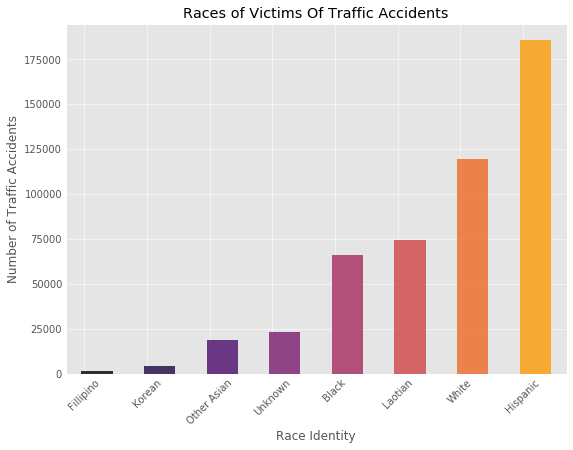

In [702]:
#---Are any persons of a particular decent more likely to be the victim of a traffic accident?---#
collision_victim_dec_df = collision_df[['victim_descent']].reset_index()
collision_victim_dec_df['accident_total'] = 1
collision_victim_dec_df.head(10)

collision_victim_dec_df_grouped = collision_victim_dec_df.groupby('victim_descent').sum().reset_index()
collision_victim_dec_df_grouped.sort_values(by=['accident_total'], inplace=True)
collision_victim_dec_df_grouped.head(20)

collision_victim_dec_df_grouped_100 = collision_victim_dec_df_grouped[collision_victim_dec_df_grouped.accident_total >= 1000]

collision_victim_dec_df_grouped_100['labels'] = ['Fillipino', 'Korean', 'Other Asian', 'Unknown', 'Black', 'Laotian', 'White', 'Hispanic']

color = cm.inferno(np.linspace(0, 1, 10))

collision_victim_dec_df_grouped_100.plot(x='labels', y='accident_total', kind='bar', color=color, figsize=(8, 6), legend = None, align='center', alpha=0.8)
plt.title('Races of Victims Of Traffic Accidents')
plt.style.use('bmh')
plt.ylabel("Number of Traffic Accidents")
plt.xlabel("Race Identity")
plt.xticks(np.arange(-0.2, 7, 1), rotation=45)
plt.show()

### <font  color=blue> Coming soon, a map of all traffic accidents in LA! </font>

In [701]:
#---Unforunately, the formatting of the latitude and longitude in the database is very difficult to work with 
#---and has thwarted my best efforts today.  I'll work on this before my interview and have it ready in no time!



#---lets get the longitude and lattitude so we can plot them on a map---#

#collision_locations_df = collision_df[['location']].reset_index()
#collision_locations_df['accident_total'] = 1

#---We can use the .str method to grab a subset of the location string but the digits of the longs and lats are not consistent---#
#collision_locations_df['str_longitude'] = collision_locations_df['location'].str[15:24]
#collision_locations_df['str_latitude'] = collision_locations_df['location'].str[111:-2]

#collision_locations_df['dum_longitude'] = collision_locations_df['str_longitude'].str.split("'", n = 2, expand = False)
#collision_locations_df['list_longitude'] = collision_locations_df['dum_longitude'].str[1:-1]

#collision_locations_df.head(100)

#BBox = (collision_locations_df.longitude.min(),   collision_locations_df.longitude.max(),      
#         collision_locations_df.latitude.min(), collision_locations_df.latitude.max())
#print(BBox)
